## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats
from scipy.stats import f
%matplotlib inline

In [7]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [8]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


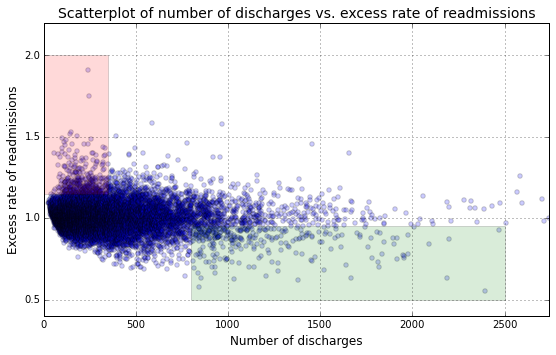

In [9]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [12]:
def LeastSquares(xs, ys):
    meanx = np.average(xs)
    varx = np.var(xs)
    meany = np.average(ys)
    slope = (np.cov(xs, ys)[0][1]) / varx
    inter = meany - slope * meanx
    return slope, inter

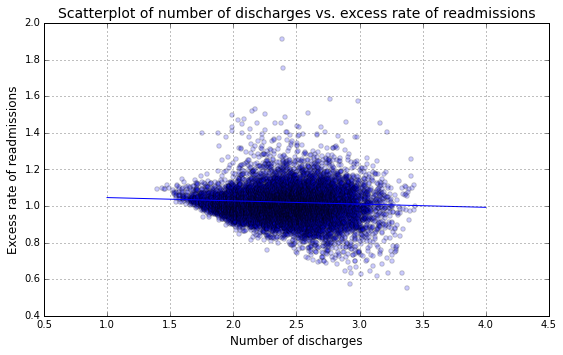

In [14]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

slope, inter = LeastSquares(np.log10(x), y)
fitx = [1, 4]
fity = [inter + slope, inter + slope*3]

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(np.log10(x), y,alpha=0.2)
ax.plot(fitx, fity)

ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [15]:
slope

-0.026629057843191639

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Analysis

There does seem to be some correlation between the number of discharges and the excess rate of readmission. However, there has been no significance testing to ensure that the observed differences are not due to chance. Additionally, there is the possibility that the groups have been cherry-picked after looking at the data.

As for the conclusions and recommendations, the notion that readmissions in smaller hospitals is due to resources seems like speculation, and is not backed-up by any of the data. If there is a correlation, it is nothing more than that. There is no guarantee that that discharge rate is a cause of readmissions. More work needs to be done to determine the cause of the higher readmission ratios. There may be other factors that are correlated.

If these directives are followed without further investigation, a great deal of money may be spend on ultimately ineffective remedies.

An additional note is that these data are not the result of a randomized trial, but observation of existing hospitals. Therefore, a more controlled data set needs to be produced to suss out the factors influencing readmission ratio.

## Hypotheses

Null Hypothesis: The average Excess Readmission Ratio is the same for hospitals with less than 100 discharges, hospitals with more than 1000 dischargees, and all other hospitals.

Alternative Hypothesis: There are differences in the average Excess Readmission Ratio among the groups of hispitals.

$H_{0}: {\mu}_{>1000} = {\mu}_{<100} = {\mu}_{others}$

$H_{a}:$ The average Excess Readmission Ratio (${\mu}_{i}$) varies across some (or all) groups.

Comparisons must be made using ANOVA. The groups to be considered are hospitals with fewer than 100 discharges, hospitals with more than 1000 discharges, and all others.

### Conditions for ANOVA:

1. Independence
    Since no hospital appears more than one group, independence can be assumed.

2. Near normality for each group.

In [22]:
# creating dataframes for each of the groups
df = clean_hospital_read_df[(clean_hospital_read_df['Excess Readmission Ratio'].notnull())]
low = df[(df['Number of Discharges'] < 100)]
high = df[(df['Number of Discharges'] > 1000)]
mid = df[(df['Number of Discharges'] < 1000) & (df['Number of Discharges'] > 100)]

In [23]:
# testing normality conditions
lowd = sorted(low['Excess Readmission Ratio'])
highd = sorted(high['Excess Readmission Ratio'])
midd = sorted(mid['Excess Readmission Ratio'])

In [24]:
def normtest(data, title):
    '''parameters: data: a pandas series, list, or numpy array
                   title: a string with a title for the histogram
       returns;:   a histogram and overlayed normal distribution for the given 
                   data series'''
    mu = np.average(data)
    sigma = np.std(data)
    fit = stats.norm.pdf(data, mu, sigma)
    plt.plot(data, fit)
    plt.hist(data, 30, normed=True)
    plt.title(title)
    print "n: ", len(data)
    print 'Mean: ', mu
    print 'Sigma: ', sigma

#### Normality tests

  ##### All Data

n:  11497
Mean:  1.0075037836
Sigma:  0.0919602664563


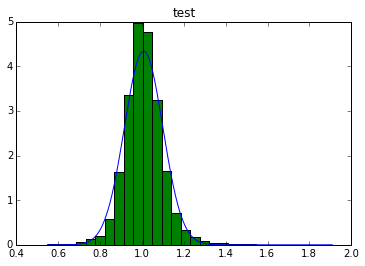

In [25]:
normtest(sorted(df['Excess Readmission Ratio']), 'test')

In [27]:
df['Excess Readmission Ratio'].describe()

count    11497.000000
mean         1.007504
std          0.091964
min          0.549500
25%          0.952600
50%          1.003500
75%          1.058100
max          1.909500
Name: Excess Readmission Ratio, dtype: float64

##### Low Discharge Hospitals

n:  1188
Mean:  1.02261835017
Sigma:  0.057954196328


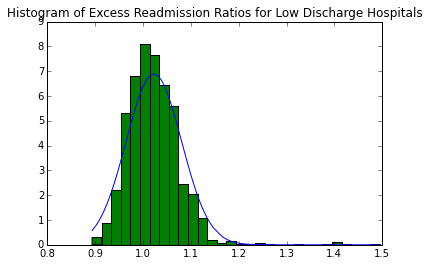

In [172]:
normtest(lowd, 'Histogram of Excess Readmission Ratios for Low Discharge Hospitals')

##### High Discharge Hospitals

n:  463
Mean:  0.978335421166
Sigma:  0.119877685856


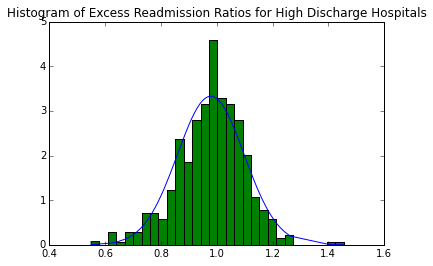

In [173]:
normtest(highd, 'Histogram of Excess Readmission Ratios for High Discharge Hospitals')

##### Mid Discharge Hospitals

n:  9810
Mean:  1.00706521916
Sigma:  0.0935119485041


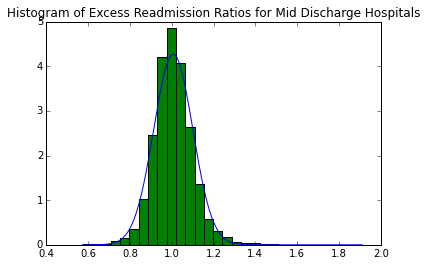

In [174]:
normtest(midd, 'Histogram of Excess Readmission Ratios for Mid Discharge Hospitals')

### Conditions for ANOVA (cont.):

2. Each group seems to be nearly normal. Skew in the low group is acceptable due to the high sample count (*n* = 1188).

3. Similar variance across groups
    While the variance is not identical across the three groups, it is similar enough to continue with ANOVA.


In [175]:
# computing the f test statistic and p value for the three groups
f_val, p_val = stats.f_oneway(lowd, highd, midd)
print 'f value: ', f_val
print 'p value: ', p_val

f value:  39.6402382813
p value:  6.97829009152e-18


#### F-distribution for the ANOVA

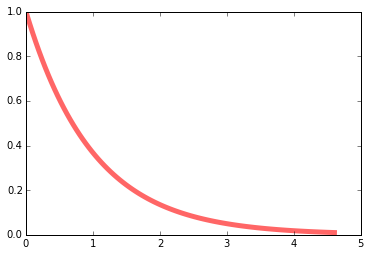

In [176]:
fig, ax = plt.subplots(1, 1)
dfn, dfd = dfg, dfe
x = np.linspace(f.ppf(0.01, dfn, dfd), f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd), 'r-', lw=5, alpha=0.6, label='f pdf')

## Reporting and Conclusions

With an F-value of 39.64 and a p-value of 6.97 x 10<sup>-18</sup>, the difference in mean excess readmission ratios among low, mid, and high-discharge hospitals is significant and not due solely to chance ($\alpha = .01$).

However, due to the weaknesses in the data discussed above, further study is required before policy recommendations can be made. Other factors, such as the location of the hospital, may be coming into play. Additional testing of groups divided by state and urban/rural may shed light on how location affects readmission rate. 

Once other factors are considered, recommendations should be made for how to bridge the gap between the groups. Once these recommendations are made, randomized trials are needed, where each idea is tested and compared with a control group. Analysis of the results will identify the most effective measures. After a cost-benefit analysis, the prescriptions with the best benefit to cost ratio should be adopted by policy makers.